# 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [4]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()        

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# object to float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')

In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.dropna(inplace = True)

# 2. EDA

In [8]:
# Gender
values = df['gender'].value_counts()
names = df['gender'].value_counts().index

fig = px.pie(values= values, names= names)
fig.update_traces(textinfo = 'percent + label', 
                  textfont_size= 12
                  ,marker=dict(line=dict(color='#000000', width = 1.2)))
fig.update_layout(title = '<b>Gender')
fig.show()

    남성 50.5%, 여성 49.5%임

In [9]:
# Gender vs Senior Citizen
## Male
v1 = df.query('gender == "Male"')['SeniorCitizen'].value_counts()

## Female
v2 = df.query('gender == "Female"')['SeniorCitizen'].value_counts()

fig = make_subplots(1, 2, specs=[[{'type' : 'domain'}, 
                                   {'type' : 'domain'}]], 
                   subplot_titles= ['Male', 'Female'])

fig.add_trace(go.Pie(values = v1, labels = ['Adult', 'Senior'], 
                     pull = [0, 0.2], scalegroup = 'one'), 
              1, 1)

fig.add_trace(go.Pie(values = v2, labels = ['Adult', 'Senior'], 
                     pull = [0, 0.2], scalegroup = 'one'), 
              1, 2)

fig.update_traces(textinfo='label+percent', textfont_size=12,
                  marker=dict(line=dict(color='#000000', width=1.2)))

fig.update_layout(title = '<b>Senior ratio per gender')
fig.show()

    남/여의 16%정도가 노인임

In [10]:
#Churn ratio per Senior citizen
fig = px.histogram(df, x = 'gender', color= 'Churn', barmode='group', facet_col= 'SeniorCitizen')
fig.update_layout(title = '<b>Churn ratio per Senior citizen')

    Senior Citizen에서 계약을 해지 하는 사람이 많음

In [11]:
# Partner & Dependents
fig = px.histogram(df, x ='Partner', color= 'Dependents', facet_col= 'Dependents', histnorm= 'probability density')
fig.update_layout(title = '<b>Relation between Partner and Dependents')
fig.show()

    Partner 가 없으면 Dependents가 낮고, partner가 있으면 dependents가 높다

In [12]:
# PaperlessBilling
fig = px.histogram(data_frame=df, color='PaperlessBilling', x = 'PaymentMethod',
                   histfunc= 'avg', histnorm= 'probability density', 
                   facet_row= 'PaperlessBilling', height= 600)
fig.update_layout(title = '<b>Paperless billing')
fig.show()

    Paperless billing 방식을 선택하는 사람들 중 40%는 전자 수표방식을 선택했고,
    Paperless billing 방식을 선택하지 않은 사람들 중 33%는 메일 방식을 선택함

In [13]:
# Contract period
fig= px.histogram(df, x = 'Contract', color= 'Churn', histfunc= 'avg', facet_col = 'Churn')
fig.update_layout(title = '<b>Contrace period')
fig.show()

    계약기간이 짧을수록 계약을 해지하는 가능성이 높음 → 초기에 계약기간을 길게 가져갈수록, 해지가능성이 낮아짐

In [14]:
# Monthly Charges
fig = px.scatter(data_frame= df, y = 'MonthlyCharges', x = 'tenure', color='MonthlyCharges', 
           facet_col= 'Contract', facet_row= 'Churn',
                color_continuous_scale= 'rdylbu')
fig.show()

    사용기간(tenure)가 짧고, 요금이 높을수록 해지 비율이 높음

In [15]:
# Tenure
fig = px.histogram(df, x = 'tenure', color = 'Churn', barmode= 'group', title = '<b>Tenure')
fig.show()

    사용기간이 짧을수록, 해지 확률이 높음
    → 계약기간이 월 단위(Month to Month)이고, 사용기간이 짧으면 해지 가능성이 높다

In [16]:
# Total Chargers
fig = px.scatter(data_frame= df, y = 'TotalCharges', x = 'tenure', color='TotalCharges', facet_col= 'Churn',
                color_continuous_scale= 'rdylbu')
fig.show()

    계속해서 이용하는 사람들은 요금의 스펙트럼이 넓은 것에 비해, 
    해지하는 사람들은 요금의 스펙트럼이 좁다

In [17]:
# Services
services = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

df_services = df[services]

In [18]:
for service in services:
   df_services[service] = df_services[service].map(lambda x :0 if x == 'No' else 1)

df_services.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,1,1,0,1,0,0,0,0
1,1,0,1,1,0,1,0,0,0
2,1,0,1,1,1,0,0,0,0
3,0,1,1,1,0,1,1,0,0
4,1,0,1,0,0,0,0,0,0


In [19]:
df['Services_sum'] = df_services.sum(axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Services_sum
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,5
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2


In [20]:
# sum of services by customer
values = df_services.sum(axis = 1).value_counts()
names = df_services.sum(axis = 1).value_counts().index

fig = px.pie(values= values, names= names, title= 'Sum of survices using')
fig.update_traces(textinfo = 'percent + label',
                 textfont_size = 12,
                  textposition = 'inside',
                 marker = dict(line = dict(color = '#000000', width = 1.2)))
fig.show()
print('Average of Services usage : %d' %df['Services_sum'].mean())

Average of Services usage : 5


    서비스 이용 수는 평균 5개이며, 7개를 사용하는 사람이 제일 많다

In [21]:
# Which service is most used?
values = df_services.sum().sort_values(ascending= False)
names = df_services.sum().sort_values(ascending= False).index

fig = px.pie(values= values, names= names, 
             title = '<b>Which service is most used?')
fig.update_traces(textinfo = 'percent + label',
                 textfont_size = 12,
                  textposition = 'inside',
                 marker = dict(line = dict(color = '#000000', width = 1.2)),
                 pull = [0.2, 0.1, 0, 0, 0, 0, 0, 0,0])
fig.show()

    Phone service와 Internet service를 가장 많이 사용함

In [22]:
order = df['Services_sum'].value_counts().index.sort_values().tolist()

fig = px.violin(data_frame= df, x = 'Services_sum', y = 'TotalCharges', color = 'Services_sum', box = True,
               category_orders={'Services_sum' : order})
fig.update_layout(title = '<b>Total Charges per Services usage')
fig.show()


In [23]:
order = df['Services_sum'].value_counts().index.sort_values().tolist()

fig = px.violin(data_frame= df, x = 'Services_sum', y = 'MonthlyCharges', color = 'Services_sum', box = True,
               category_orders={'Services_sum' : order})
fig.update_layout(title = '<b>Monthly Charges per Services usage')
fig.show()

    요금대는 서비스 7~8개 이용할 때 가격대가 오히려 낮다.

# 3. Modeling

In [24]:
# Vaild Features Selection

features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 
            'Churn', 'Services_sum']

df_f = df[features]
df_f.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,MonthlyCharges,TotalCharges,Churn,Services_sum
0,Female,0,Yes,No,1,Month-to-month,29.85,29.85,No,3
1,Male,0,No,No,34,One year,56.95,1889.50,No,4
2,Male,0,No,No,2,Month-to-month,53.85,108.15,Yes,4
3,Male,0,No,No,45,One year,42.30,1840.75,No,5
4,Female,0,No,No,2,Month-to-month,70.70,151.65,Yes,2


In [25]:
df_f['Churn'].replace('Yes', 1, inplace = True)
df_f['Churn'].replace('No', 0, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
## One-hot encoding

df_encoding = pd.get_dummies(df_f[features])
df_encoding.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Services_sum,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,29.85,29.85,0,3,1,0,0,1,1,0,1,0,0
1,0,34,56.95,1889.50,0,4,0,1,1,0,1,0,0,1,0
2,0,2,53.85,108.15,1,4,0,1,1,0,1,0,1,0,0
3,0,45,42.30,1840.75,0,5,0,1,1,0,1,0,0,1,0
4,0,2,70.70,151.65,1,2,1,0,1,0,1,0,1,0,0


In [27]:
px.bar(df_encoding.corr()['Churn'].sort_values(ascending = False))

In [28]:
# Split train/test dataset

X = df_encoding.drop(columns= 'Churn')
y = df_encoding['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(5625, 14) (1407, 14) (5625,) (1407,)


In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=15, n_jobs = -1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7867803837953091

0.7839374555792467


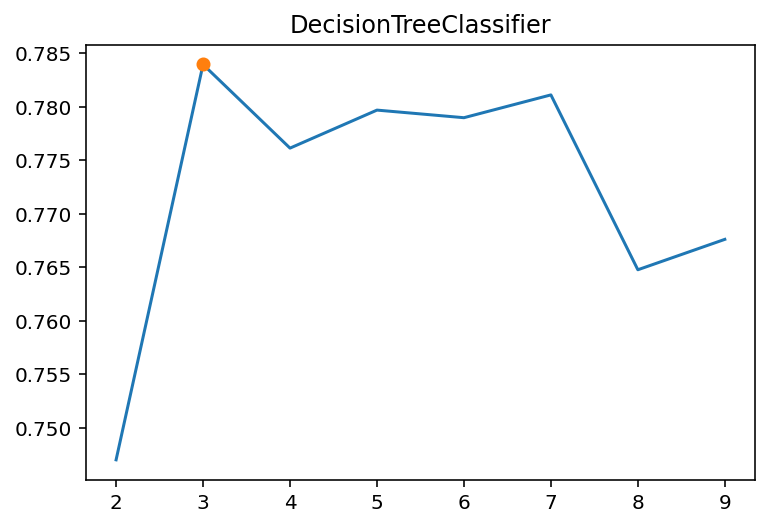

In [30]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf_score = []

for max_depth in range(2, 10):
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state = 15).fit(X_train, y_train)
    clf_score.append(clf.score(X_test, y_test))

# fig = px.line(x = range(2, 10), y = tree_score)
g = plt.plot(range(2, 10), clf_score)
g = plt.plot(clf_score.index(max(clf_score)) + min(range(2,10)), max(clf_score), 'o')
g = plt.title('DecisionTreeClassifier')
print(max(clf_score))

0.7775408670931059


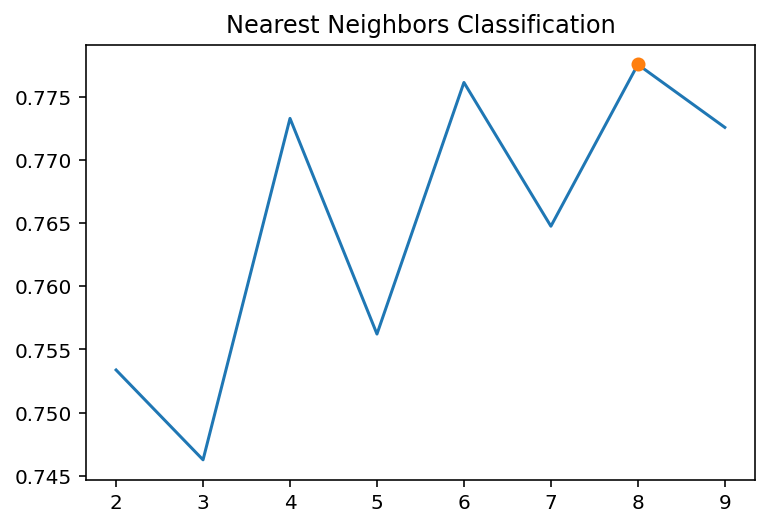

In [31]:
# Nearest Neighbors Classification

from sklearn.neighbors import KNeighborsClassifier

clf_score = []

for n_neighbors in range(2, 10):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors, 
                           n_jobs= -1).fit(X_train, y_train)
    clf_score.append(clf.score(X_test, y_test))

    
g = plt.plot(range(2, 10), clf_score)
g = plt.plot(clf_score.index(max(clf_score)) + min(range(2,10)), max(clf_score), 'o')
g = plt.title('Nearest Neighbors Classification')
print(max(clf_score))

In [32]:
# Support Vector Machines

from sklearn.svm import SVC

clf = SVC().fit(X_train, y_train)

clf.score(X_test, y_test)

0.7391613361762616

0.7945984363894811


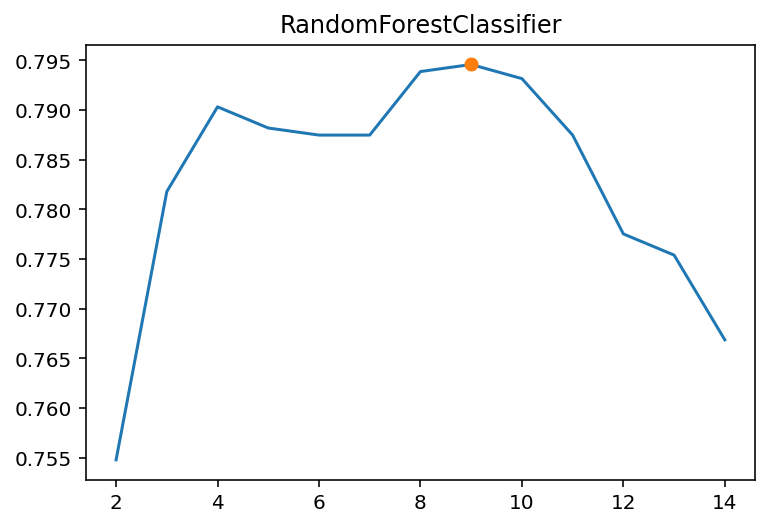

In [33]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf_score = []

for max_depth in range(2, 15):
    clf = RandomForestClassifier(max_depth = max_depth, random_state = 15).fit(X_train, y_train)
    clf_score.append(clf.score(X_test, y_test))

# fig = px.line(x = range(2, 10), y = tree_score)
g = plt.plot(range(2, 15), clf_score)
g = plt.plot(clf_score.index(max(clf_score)) + min(range(2,15)), max(clf_score), 'o')
g = plt.title('RandomForestClassifier')
print(max(clf_score))

0.7889125799573561


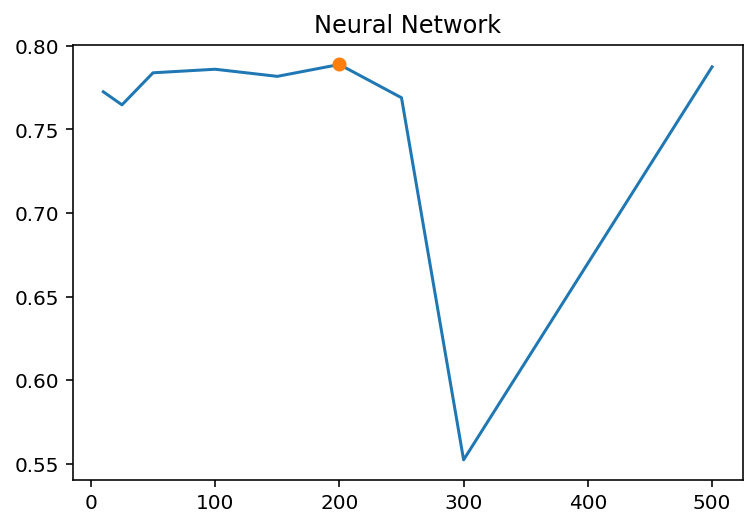

In [34]:
# Neural Network

from sklearn.neural_network import MLPClassifier

clf_score = []
layers = [10, 25, 50, 100, 150, 200, 250, 300, 500]

for hidden_layer_sizes in layers:
    clf = MLPClassifier(hidden_layer_sizes= hidden_layer_sizes , 
                        random_state = 15).fit(X_train, y_train)
    clf_score.append(clf.score(X_test, y_test))

g = plt.plot(layers, clf_score)
g = plt.plot(layers[clf_score.index(max(clf_score))], max(clf_score), 'o')
g = plt.title('Neural Network')
print(max(clf_score))

       RandomForestClassifier가 79.4%로 가장 성능이 좋음